In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Treatment

#### do we need to convert the data?

In [6]:
numerics = ['int64', 'float64']
telecom.select_dtypes(exclude=numerics)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


columns which are not numeric are date and those date columns are not useful.
- deleting the columns

In [7]:
date_cols = telecom.select_dtypes(exclude=numerics).columns

In [8]:
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
telecom.drop(date_cols, axis=1, inplace=True)

#### No Variance in Data means no Info for model!

In [10]:
for col in telecom.select_dtypes(include=numerics).columns:
    std = np.std(telecom[col])
    if not std:
        print(f'{col}:      {std} ')

circle_id:      0.0 
loc_og_t2o_mou:      0.0 
std_og_t2o_mou:      0.0 
loc_ic_t2o_mou:      0.0 
std_og_t2c_mou_6:      0.0 
std_og_t2c_mou_7:      0.0 
std_og_t2c_mou_8:      0.0 
std_og_t2c_mou_9:      0.0 
std_ic_t2o_mou_6:      0.0 
std_ic_t2o_mou_7:      0.0 
std_ic_t2o_mou_8:      0.0 
std_ic_t2o_mou_9:      0.0 


In [11]:
non_info_column = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',\
                   'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
'std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']

In [12]:
telecom = telecom.drop(non_info_column, axis = 1)

In [13]:
telecom.shape

(99999, 202)

### MIssing value

In [14]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('%')).sort_values('%', ascending=False)
len(df_missing_columns[df_missing_columns['%'] > 40])

36

#### columns with missing values more than 40%  == 40 columns

In [15]:
missing_columns = list(df_missing_columns[df_missing_columns['%'] > 40].index)
missing_columns

['count_rech_3g_6',
 'fb_user_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'arpu_3g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'arpu_3g_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'night_pck_user_7',
 'count_rech_3g_9',
 'fb_user_9',
 'total_rech_data_9',
 'arpu_3g_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'total_rech_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'arpu_2g_8',
 'fb_user_8']

In [16]:
telecom.drop(missing_columns, axis=1, inplace= True)

In [17]:
telecom.shape

(99999, 166)

### filtering High Value customers
-recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

In [18]:
month_6_7_avg = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [19]:
recharge_70_quantile = month_6_7_avg.quantile(.7)

In [20]:
telecom =  telecom[month_6_7_avg >= recharge_70_quantile]

In [21]:
telecom.shape

(30011, 166)

### MOU Null data treatment

In [22]:
(telecom.isnull().sum()/telecom.shape[0]).to_frame('%').sort_values('%', ascending=False)

,%
og_others_9,0.056779
roam_ic_mou_9,0.056779
loc_og_t2f_mou_9,0.056779
loc_og_t2m_mou_9,0.056779
isd_og_mou_9,0.056779
...,...
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
last_day_rch_amt_6,0.000000
last_day_rch_amt_7,0.000000


In [23]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
telecom_null_mou_9 = telecom[(telecom['loc_og_t2m_mou_9'].isnull()) & (telecom['loc_ic_t2f_mou_9'].isnull()) & (telecom['roam_og_mou_9'].isnull()) & (telecom['std_ic_t2m_mou_9'].isnull()) &
  (telecom['loc_og_t2t_mou_9'].isnull()) & (telecom['std_ic_t2t_mou_9'].isnull()) & (telecom['loc_og_t2f_mou_9'].isnull()) & (telecom['loc_ic_mou_9'].isnull()) &
  (telecom['loc_og_t2c_mou_9'].isnull()) & (telecom['loc_og_mou_9'].isnull()) & (telecom['std_og_t2t_mou_9'].isnull()) & (telecom['roam_ic_mou_9'].isnull()) &
  (telecom['loc_ic_t2m_mou_9'].isnull()) & (telecom['std_og_t2m_mou_9'].isnull()) & (telecom['loc_ic_t2t_mou_9'].isnull()) & (telecom['std_og_t2f_mou_9'].isnull()) & 
  (telecom['og_others_9'].isnull()) & (telecom['std_og_mou_9'].isnull()) & (telecom['spl_og_mou_9'].isnull()) & 
  (telecom['std_ic_t2f_mou_9'].isnull()) & (telecom['isd_og_mou_9'].isnull()) & (telecom['std_ic_mou_9'].isnull()) & (telecom['offnet_mou_9'].isnull()) & 
  (telecom['isd_ic_mou_9'].isnull()) & (telecom['ic_others_9'].isnull()) & (telecom['onnet_mou_9'].isnull()) & 
  (telecom['spl_ic_mou_9'].isnull())]

telecom_null_mou_9.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,...,0,0,0,0,0,502,0.00,0.00,0.00,0.0
111,7001300706,596.301,146.073,0.000,0.0,55.19,3.26,NaN,NaN,45.51,...,0,1,0,0,0,332,0.00,0.00,0.00,0.0
143,7000106299,695.609,39.981,0.000,0.0,1325.91,28.61,NaN,NaN,13.91,...,0,0,0,0,0,264,0.00,0.00,0.00,0.0
188,7000340381,734.641,183.668,0.000,0.0,4.38,0.98,NaN,NaN,105.16,...,0,0,0,0,0,244,0.00,831.48,1223.04,0.0


In [24]:
telecom_null_mou_9.shape

(1704, 166)

In [25]:
# drop the rows where we don't have actual outcome
telecom.drop(telecom_null_mou_9.index, inplace=True)

#### Month #8

In [26]:
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('%')).sort_values('%', ascending=False)
telecom_missing_columns

,%
loc_ic_t2f_mou_8,0.55
loc_og_t2f_mou_8,0.55
spl_og_mou_8,0.55
loc_og_t2m_mou_8,0.55
loc_ic_t2t_mou_8,0.55
...,...
arpu_6,0.00
loc_ic_t2m_mou_9,0.00
loc_ic_t2t_mou_9,0.00
total_og_mou_9,0.00


In [27]:
missing_8_month_col = telecom_missing_columns[telecom_missing_columns['%'] == 0.55].index.to_list()

In [28]:
telecom_8_month_missing = telecom['loc_og_t2m_mou_8'].isnull()
for col in missing_8_month_col:
    telecom_8_month_missing = telecom[col].isnull() & telecom_8_month_missing
    
    
telecom[telecom_8_month_missing].head()
    

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
375,7002252754,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,...,0,0,0,0,0,1102,0.0,0.0,0.0,0.0
578,7000248548,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,...,0,0,0,0,0,274,0.0,0.0,0.0,0.0
788,7000636808,532.742,546.756,0.0,269.274,1173.39,891.83,NaN,149.34,61.59,...,0,0,0,0,0,936,0.0,0.0,0.0,0.0
1802,7000516213,810.455,0.000,0.0,0.000,91.33,NaN,NaN,0.00,1371.04,...,0,0,0,0,0,755,0.0,0.0,0.0,0.0
4837,7002192662,649.150,149.572,0.0,0.250,1354.24,85.13,NaN,0.43,50.63,...,0,0,0,0,0,520,0.0,0.0,0.0,0.0


In [29]:
telecom[telecom_8_month_missing].index

Int64Index([  375,   578,   788,  1802,  4837,  5111,  5221,  6520,  7057,
             7229,
            ...
            94155, 94628, 95327, 95493, 95894, 96165, 96376, 98317, 98635,
            99059],
           dtype='int64', length=157)

In [30]:
telecom = telecom.drop(telecom[telecom_8_month_missing].index)

#### Month #6

In [31]:
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('%')).sort_values('%', ascending=False)
telecom_missing_columns

,%
std_og_mou_6,0.44
std_ic_t2f_mou_6,0.44
loc_ic_mou_6,0.44
std_og_t2t_mou_6,0.44
loc_og_t2c_mou_6,0.44
...,...
og_others_8,0.00
spl_og_mou_9,0.00
spl_og_mou_8,0.00
isd_og_mou_9,0.00


In [32]:
missing_6_month_col = telecom_missing_columns[telecom_missing_columns['%'] == 0.44].index.to_list()

In [33]:
missing_6_month_col

['std_og_mou_6',
 'std_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'std_ic_t2t_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'ic_others_6',
 'loc_ic_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'std_ic_t2m_mou_6',
 'std_og_t2f_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'roam_og_mou_6',
 'loc_og_mou_6',
 'isd_og_mou_6',
 'spl_ic_mou_6',
 'roam_ic_mou_6',
 'isd_ic_mou_6',
 'og_others_6',
 'spl_og_mou_6',
 'offnet_mou_6',
 'onnet_mou_6',
 'std_ic_mou_6',
 'loc_ic_t2t_mou_6']

In [34]:
telecom_6_month_missing = telecom['std_og_mou_6'].isnull()
for col in missing_6_month_col:
    telecom_6_month_missing = telecom[col].isnull() & telecom_6_month_missing
    
    
telecom[telecom_6_month_missing].head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
77,7001328263,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,...,0,0,0,0,0,1894,0.00,0.00,0.00,0.00
364,7002168045,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,...,0,0,0,1,0,424,0.00,0.00,0.00,0.00
423,7000635248,213.802,304.194,149.710,329.643,NaN,0.00,0.00,0.00,NaN,...,1,0,0,0,0,945,73.55,266.94,63.04,0.00
934,7002152278,48.000,764.152,500.030,194.400,NaN,14.24,17.48,7.69,NaN,...,0,0,0,2,1,490,188.83,215.00,0.00,24.18
1187,7000486275,0.000,757.170,995.719,0.000,NaN,1366.71,2268.91,0.00,NaN,...,0,0,0,0,0,737,0.00,0.00,0.00,0.00


In [35]:
telecom = telecom.drop(telecom[telecom_6_month_missing].index)

In [36]:
telecom.shape

(28026, 166)

In [37]:
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('%')).sort_values('%', ascending=False)
telecom_missing_columns

,%
std_og_t2m_mou_7,0.12
og_others_7,0.12
loc_og_t2t_mou_7,0.12
loc_ic_t2t_mou_7,0.12
spl_ic_mou_7,0.12
...,...
spl_og_mou_9,0.00
og_others_6,0.00
og_others_8,0.00
og_others_9,0.00


#### month 7

In [38]:
missing_7_month_col = telecom_missing_columns[telecom_missing_columns['%'] == 0.12].index.to_list()

In [39]:
telecom_7_month_missing = telecom['std_og_t2m_mou_7'].isnull()
for col in missing_7_month_col:
    telecom_7_month_missing = telecom[col].isnull() & telecom_7_month_missing
    
    
telecom[telecom_7_month_missing].head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
5616,7001238202,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,...,0,0,0,0,0,576,63.38,0.0,0.0,163.39
9451,7001477649,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,...,0,0,0,0,0,672,0.00,0.0,0.0,0.00
9955,7001658068,925.028,189.000,789.761,445.707,46.39,NaN,43.39,56.61,333.78,...,0,0,0,0,0,3107,0.00,0.0,0.0,0.00
10724,7001391499,894.818,85.000,207.040,363.314,117.21,NaN,97.01,35.43,119.79,...,0,0,0,0,0,2664,0.00,0.0,0.0,0.00
12107,7000131738,1803.475,0.000,0.600,25.243,1742.61,NaN,0.00,0.00,278.79,...,0,0,0,0,0,219,0.00,0.0,0.0,0.00


In [40]:
telecom.drop(telecom[telecom_7_month_missing].index, inplace=True)

In [41]:
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('%')).sort_values('%', ascending=False)
telecom_missing_columns

,%
mobile_number,0.0
std_ic_mou_9,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
...,...
std_og_mou_9,0.0
isd_og_mou_6,0.0
isd_og_mou_7,0.0
isd_og_mou_8,0.0


In [42]:
telecom.shape

(27991, 166)

### Tagging churned custome
- churn=1, else = 0<br>
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    - total_ic_mou_9

    - total_og_mou_9

    - vol_2g_mb_9

    - vol_3g_mb_9

In [43]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

#### deleting all column belongs to month 9

In [44]:
columns = [col for col in telecom.columns.to_list() if '_9' in col]
print(columns)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [45]:
telecom.drop(columns, axis=1, inplace=True)

In [46]:
not_churned = telecom[telecom['churn'] == 0].shape[0]/telecom.shape[0]

In [47]:
1 - not_churned, not_churned

(0.03390375477832164, 0.9660962452216784)

#### There is class Imbalance

Converting mobile number and churn data to Object

In [48]:
telecom['mobile_number'] = telecom['mobile_number'].astype(object)
telecom['churn'] = telecom['churn'].astype(object)

In [49]:
# List only the numeric columns
numeric_cols = telecom.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)


In [50]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = telecom[col].quantile(0.05)
    q3 = telecom[col].quantile(0.95)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = telecom.loc[(telecom[col] > range_low) & (telecom[col] < range_high)]

data.shape

(27141, 127)

### Derive New Features

In [51]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [52]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = data['total_og_mou_6'] + data['total_ic_mou_6']
data.shape

(27141, 128)

In [53]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [54]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [55]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [56]:
data.shape

(27141, 131)

In [57]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [58]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [59]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

#### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.


In [60]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [61]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

#### Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [63]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [64]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [65]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [66]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


#### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [67]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [68]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [69]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

### EDA

In [70]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

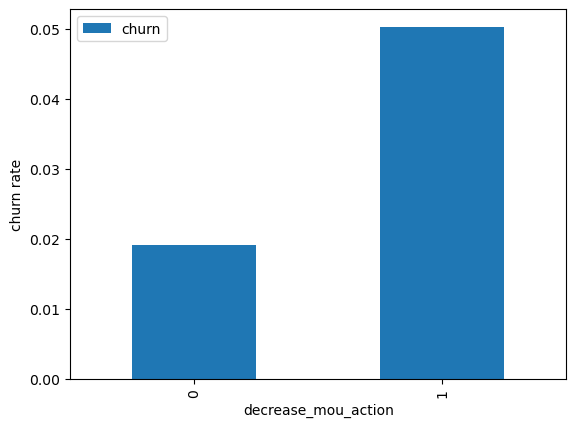

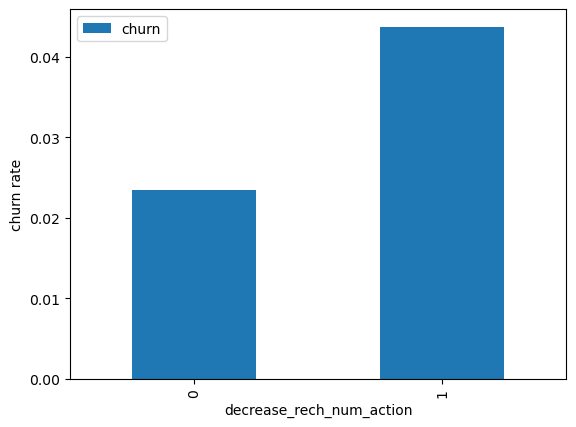

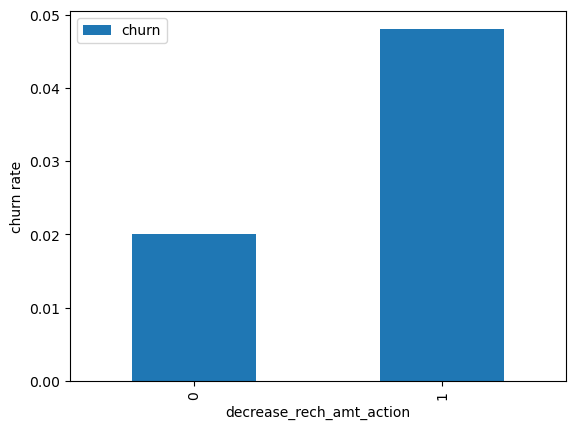

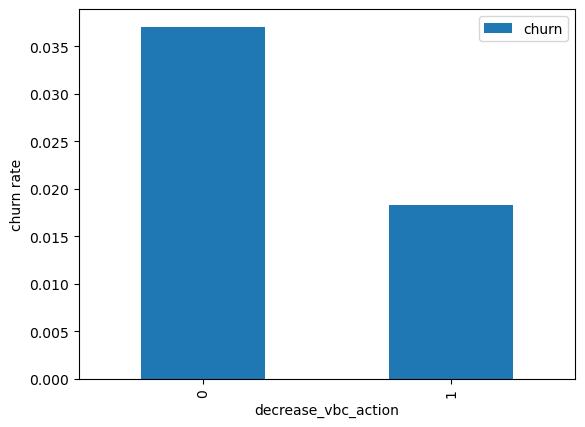

In [71]:
## based on new dervide column where we saw decrease trends
columns = ['decrease_mou_action', "decrease_rech_num_action", 'decrease_rech_amt_action',\
          'decrease_vbc_action']
for col in columns:
    data.pivot_table(values='churn', index=col, aggfunc='mean').plot.bar()
    plt.ylabel('churn rate')
    plt.show()

#### Analysis

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

#### Churn rate on the basis whether the customer decreased her/his number of recharge in action month, recharge amount, VBC

In [72]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

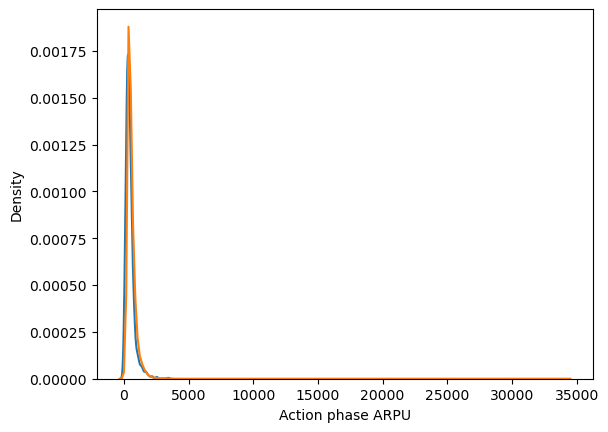

In [73]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

#### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

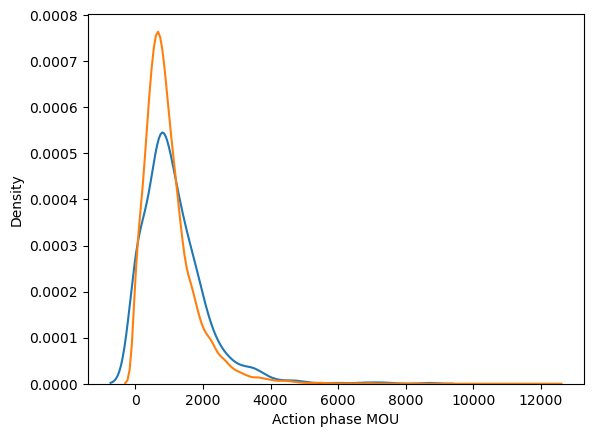

In [74]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

### BiVariate analysis


#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

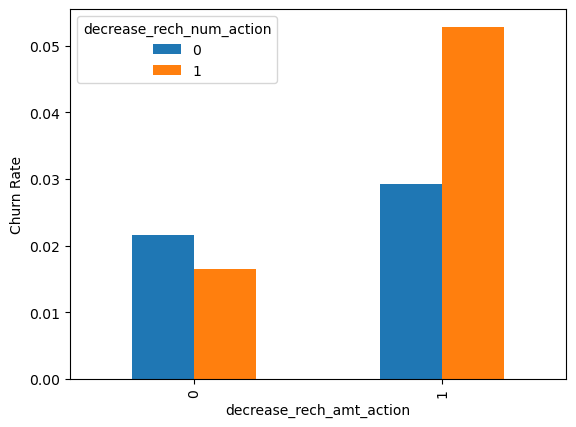

In [75]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('Churn Rate')
plt.show()

In [76]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean')

decrease_rech_num_action,0,1
decrease_rech_amt_action,,
0,0.021538,0.016436
1,0.029270,0.052871


#### Analysis

Whose recharge amount as well as number of recharge are propotionately increased in decrease column


#### Analysis of recharge amount and number of recharge in action month

[(0.0, 5000.0)]

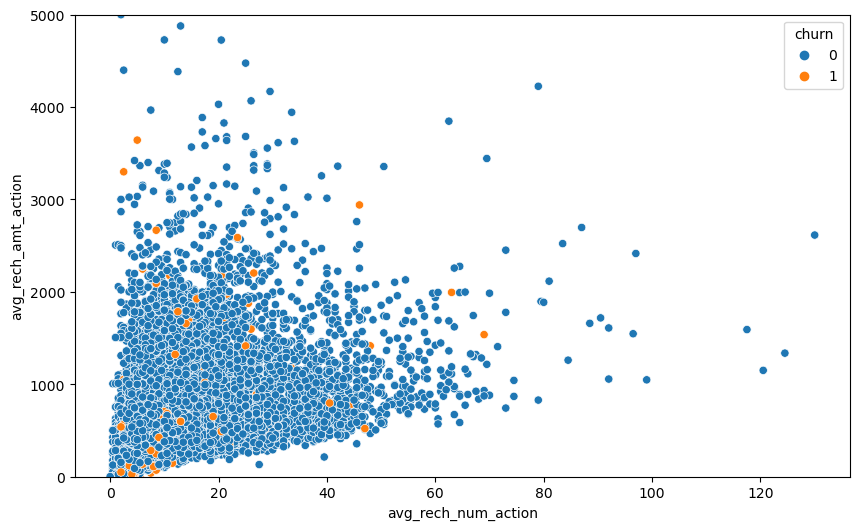

In [77]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=data, x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn')
ax.set(ylim=(0,5000))

#### Analysis

It is not certain but there is pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [78]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

### Train-Test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = data.drop(['mobile_number','churn'], axis=1) # feature variable

In [81]:
y = data['churn'] #target variable

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7, test_size=.3, random_state=42)

#### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [83]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [84]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [85]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Feature scaling

In [86]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [87]:
# Instantiate the Scaler
scaler = StandardScaler()

In [88]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [89]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [90]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,-0.059046,-0.606116,-0.183108,-0.684770,-0.685464,-0.384302,-0.564989,-0.642512,0.079073,-0.262959,...,0.294872,-0.235658,-0.251004,-0.247759,-0.030676,0,0,1,1,0
1,-0.496794,-0.457640,-0.419522,-0.747375,-0.672423,-0.532778,-0.431249,-0.443588,-0.438864,-0.262959,...,1.968847,0.788897,-0.251004,-0.247759,-0.141702,1,1,1,1,0
2,-0.599501,-0.584052,-0.398261,-0.589391,-0.612134,-0.442052,-0.393570,-0.181744,-0.091445,0.079554,...,1.229265,-0.235658,-0.251004,-0.247759,-0.141702,0,1,0,1,0
3,-0.306213,0.534775,0.914546,-0.468931,-0.358179,-0.066832,0.620896,2.009985,2.562683,-0.240084,...,-0.126246,-0.235658,-0.251004,-0.247759,-0.141702,0,0,0,0,0
4,-0.742895,2.403858,4.718407,-0.373120,6.360924,15.204583,-0.714124,-0.531214,-0.544373,-0.244028,...,1.373915,-0.235658,-0.251004,-0.247759,-0.141702,0,0,0,0,0


#### Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

In [91]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

#### Model with PCA
We have more than 100+ column, using PCA to reduce features

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(random_state=42)

In [94]:
pca.fit(X_train)

PCA(random_state=42)

In [95]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10981827 0.19001276 0.24580313 0.29019856 0.33200403 0.369038
 0.40291666 0.4333662  0.46093182 0.48626858 0.51096463 0.53286159
 0.55447037 0.57531222 0.59488603 0.61308662 0.62927642 0.64493019
 0.65910282 0.67271938 0.68609134 0.69898524 0.71076834 0.72108339
 0.7308302  0.74037587 0.74977031 0.75886076 0.76754673 0.77603843
 0.78414468 0.79186554 0.79952898 0.80697714 0.81421766 0.82133576
 0.8280323  0.83451383 0.84089184 0.8471658  0.85325304 0.85930005
 0.86499654 0.87054216 0.87596484 0.88113002 0.88614793 0.89057951
 0.89491079 0.8988329  0.90252748 0.90618293 0.90977116 0.91322745
 0.9166584  0.92004571 0.92337793 0.92648512 0.92955809 0.93252567
 0.93546587 0.93824584 0.94095809 0.94362463 0.94619301 0.94862958
 0.95100782 0.95336713 0.95568685 0.95793363 0.96013797 0.96224932
 0.96426375 0.9662471  0.96819147 0.97007506 0.97194278 0.97375376
 0.97544189 0.97710685 0.97873067 0.98031429 0.98188269 0.98343108
 0.9849369  0.98639862 0.98776821 0.98901764 0.99015812 0.991223

#### around 42 features we get 85% and 54feature: 89% variance

Text(0, 0.5, 'Cumulative Variance')

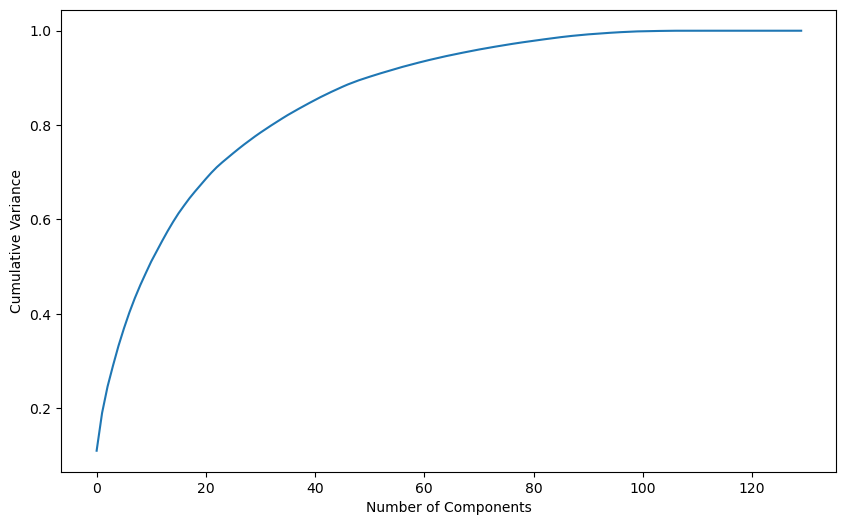

In [96]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.


#### Performing PCA with 60 components

In [97]:
from sklearn.decomposition import IncrementalPCA

In [98]:
pca_final = IncrementalPCA(n_components=60)

In [99]:
X_train_pca = pca_final.fit_transform(X_train)

#### Applying transformation on the test set

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.


In [100]:
X_test_pca = pca_final.transform(X_test)

The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

#### Logistic regression with PCA

In [101]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [102]:
# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [103]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [104]:
folds = KFold(n_splits=5, shuffle=True, random_state=4 )

In [105]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [106]:
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs=-1) 

In [107]:
# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [108]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.940333,0.064218,0.010130,0.002140,0.01,{'C': 0.01},0.908595,0.903814,0.898166,0.893680,...,0.902140,0.005484,6,0.902434,0.903833,0.903536,0.902970,0.903098,0.903174,0.000482
1,1.384211,0.144458,0.010638,0.002582,0.1,{'C': 0.1},0.909413,0.905473,0.900630,0.894765,...,0.903668,0.005368,5,0.904820,0.905396,0.904966,0.904609,0.904329,0.904824,0.000358
2,1.741253,0.188682,0.012447,0.006860,1,{'C': 1},0.909413,0.904643,0.901177,0.895308,...,0.903828,0.005182,1,0.904411,0.905192,0.905034,0.904609,0.904124,0.904674,0.000394
3,1.754485,0.257079,0.011009,0.003038,10,{'C': 10},0.909413,0.904643,0.901177,0.895308,...,0.903828,0.005182,1,0.904411,0.905124,0.904966,0.904609,0.904192,0.904661,0.000344
4,1.770481,0.245816,0.011230,0.001596,100,{'C': 100},0.909413,0.904643,0.901177,0.895308,...,0.903828,0.005182,1,0.904411,0.905124,0.904966,0.904609,0.904192,0.904661,0.000344
5,1.380358,0.194702,0.006203,0.001754,1000,{'C': 1000},0.909413,0.904643,0.901177,0.895308,...,0.903828,0.005182,1,0.904411,0.905124,0.904966,0.904609,0.904192,0.904661,0.000344


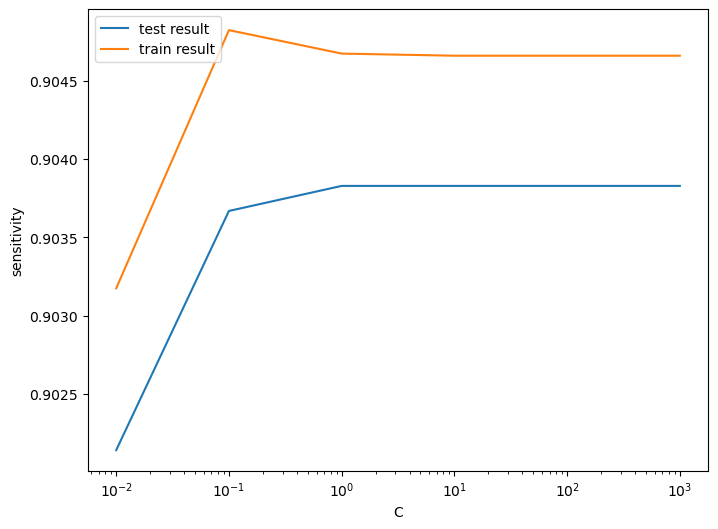

In [109]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [110]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("sensitivity is {0} at C = {1}".format(best_score, best_C))

sensitivity is 0.9038284946363715 at C = 1


#### Logistic regression with optimal C

In [111]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [112]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on the train set

In [113]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15501  2831]
 [ 1754 16578]]


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8749454505782238
Sensitivity:- 0.9043203142046694
Specificity:- 0.8455705869517783


In [117]:
#### Prediction on the test set

In [118]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6588 1275]
 [  62  218]]


In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8358098980719636
Sensitivity:- 0.9043203142046694
Specificity:- 0.8455705869517783


#### Model summary

    Train set
        Accuracy = 0.8749
        Sensitivity = 0.9043
        Specificity = 0.8455
    Test set
        Accuracy = 0.835
        Sensitivity = 0.904
        Specificity = 0.8455

Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Support Vector Machine(SVM) with PCA

In [121]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [122]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs=-1)      

# fit the model
model_cv.fit(X_train_pca, y_train)   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,62.403455,2.958671,29.688075,0.238363,1,0.01,"{'C': 1, 'gamma': 0.01}",0.942808,0.946731,0.943949,0.944496,0.001648,5,0.953113,0.948451,0.948861,0.950142,0.002108
1,79.337435,1.419954,37.935145,0.207707,1,0.001,"{'C': 1, 'gamma': 0.001}",0.885943,0.892971,0.883561,0.887492,0.003995,10,0.889125,0.887984,0.890398,0.889169,0.000986
2,83.928944,14.433905,45.768866,0.496622,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.860007,0.865641,0.857704,0.861117,0.003334,12,0.861754,0.860124,0.863642,0.861840,0.001438
3,32.216289,1.311665,16.514867,0.456951,10,0.01,"{'C': 10, 'gamma': 0.01}",0.962199,0.967188,0.966860,0.965416,0.002278,3,0.976107,0.973612,0.973571,0.974430,0.001186
4,43.406932,1.181862,29.177514,0.457520,10,0.001,"{'C': 10, 'gamma': 0.001}",0.913271,0.919565,0.911464,0.914767,0.003472,7,0.919565,0.916541,0.916991,0.917699,0.001332
5,55.931181,1.117274,34.016339,0.731652,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.876370,0.881270,0.872433,0.876691,0.003615,11,0.879061,0.877306,0.879475,0.878614,0.000940
6,37.559147,0.120510,10.336759,0.530704,100,0.01,"{'C': 100, 'gamma': 0.01}",0.972099,0.978316,0.976516,0.975644,0.002612,1,0.990795,0.990345,0.990590,0.990577,0.000184
7,46.530609,2.098847,25.642462,1.063287,100,0.001,"{'C': 100, 'gamma': 0.001}",0.937162,0.943622,0.939694,0.940159,0.002657,6,0.949718,0.945383,0.945792,0.946964,0.001954
8,57.745538,1.917113,30.852257,0.583669,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.889789,0.894362,0.887161,0.890438,0.002975,9,0.893380,0.890194,0.893180,0.892251,0.001457
9,62.832208,4.969135,7.631636,0.406902,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.971772,0.978480,0.974388,0.974880,0.002760,2,0.997995,0.997709,0.998241,0.997982,0.000217


#### Plotting the accuracy with various C and gamma values

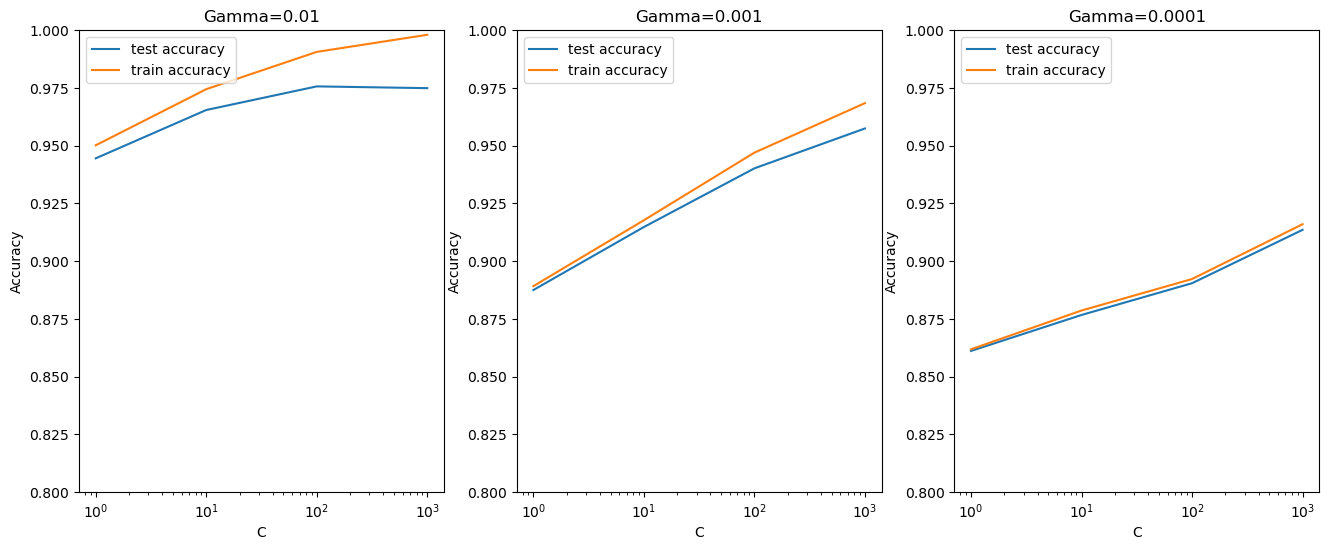

In [124]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [125]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9756437798463651 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


#### From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

    High gamma (i.e. high non-linearity) and average value of C
    Low gamma (i.e. less non-linearity) and high value of C



#### Build the model with optimal hyperparameters
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

In [126]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

In [127]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15958  2374]
 [ 1474 16858]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8950469125027275
Sensitivity:- 0.9195941523019856
Specificity:- 0.8704996727034694


#### Prediction on the test set

In [131]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [132]:
confusion_metrics = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_metrics)

[[6820 1043]
 [  68  212]]


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8635637971263662
Sensitivity:- 0.9195941523019856
Specificity:- 0.8704996727034694


#### Model summary

    Train set
        Accuracy = 0.89
        Sensitivity = 0.92
        Specificity = 0.87
    Test set
        Accuracy = 0.86
        Sensitivity = 0.91
        Specificity = 0.87

#### Decision tree with PCA

In [134]:
from sklearn.tree import DecisionTreeClassifier

#### hyper parameter Tuning

In [135]:
param_grid = {
    'max_depth': range(5, 15, 5),
    
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [136]:
tree = DecisionTreeClassifier()

In [137]:
gridSearch = GridSearchCV(estimator = tree,
                         param_grid=param_grid,
                         scoring='recall',
                         cv=5,
                         verbose=1,
                         n_jobs=-1)
gridSearch.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [138]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", gridSearch.best_score_)
print(gridSearch.best_estimator_)

Best sensitivity:- 0.9024103894140854
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters


In [139]:
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### prediction

In [140]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16486  1846]
 [ 1511 16821]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9084387955487672
Sensitivity:- 0.9175758236962688
Specificity:- 0.8993017674012656


In [142]:
#### Prediction on the test set

In [143]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6919  944]
 [ 123  157]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8689672111015596
Sensitivity:- 0.5607142857142857
Specificity:- 0.8799440417143584


#### Model summary

    Train set
        Accuracy = 0.91
        Sensitivity = 0.92
        Specificity = 0.90
    Test set
        Accuracy = 0.87
        Sensitivity = 0.56
        Specificity = 0.88

##### We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Random forest with PCA

In [145]:
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter Tuning

In [146]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [147]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8530167226567794 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


#### Model with optimal Hyperparameter

In [148]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=100)

In [149]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)

#### Prediction on the train set

In [150]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15390  2942]
 [ 2489 15843]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8518710451669212
Sensitivity:- 0.8642264891992145
Specificity:- 0.839515601134628


#### Prediction on the test set

In [152]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6522 1341]
 [  89  191]]


In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.824389045806214
Sensitivity:- 0.6821428571428572
Specificity:- 0.8294544067149943


#### Model summary

    Train set
        Accuracy = 0.85
        Sensitivity = 0.87
        Specificity = 0.83
    Test set
        Accuracy = 0.82
        Sensitivity = 0.68
        Specificity = 0.83

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Final conclusion with PCA

After trying several models we can see that for achieving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 91%. Also we have good accuracy of approx 85%.

#### Without PCA
Logistic regression with No PCA

In [154]:
#importing statsmodel for adding constant
import statsmodels.api as sm

In [155]:
# adding constant
log_no_pca = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())


In [156]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [157]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36664
Model:                            GLM   Df Residuals:                    36533
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Jun 2023   Deviance:                       20053.
Time:                        11:56:46   Pearson chi2:                 4.03e+07
No. Iterations:                    39   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -50.8284   4462.094     -0.011      0.991   -8796.372    8694.715
arpu_6                       0.2698      0.109      2.476      0.013       0.056       0.483
arpu_7                       0.4292      0.123      3.485      0.000       0.188       0.671
arpu_8                       0.5057      0.143      3.526      0.000       0.225       0.787
onnet_mou_6                  9.2021      3.449      2.668      0.008       2.443      15.962
onnet_mou_7                  1.0589      1.935      0.547      0.584      -2.734       4.852
onnet_mou_8                 -1.0079      1.789     -0.564      0.573      -4.513       2.498
offnet_mou_6                10.0595      3.763      2.673      0.008       2.683      17.436
offnet_mou_7                 2.7282      2.056      1.327      0.184      -1.301       6.757
offnet_mou_8                -4.2902      1.872     -2.292      0.022      -7.959      -0.621
roam_ic_mou_6                0.3344      0.044      7.642      0.000       0.249       0.420
roam_ic_mou_7                0.1664      0.065      2.576      0.010       0.040       0.293
roam_ic_mou_8                0.2330      0.054      4.340      0.000       0.128       0.338
roam_og_mou_6               -3.4588      1.205     -2.872      0.004      -5.820      -1.098
roam_og_mou_7               -0.5691      0.560     -1.016      0.309      -1.666       0.528
roam_og_mou_8                1.2619      0.562      2.247      0.025       0.161       2.363
loc_og_t2t_mou_6           376.4100    693.176      0.543      0.587    -982.190    1735.010
loc_og_t2t_mou_7         -2632.0509    729.656     -3.607      0.000   -4062.150   -1201.951
loc_og_t2t_mou_8          7505.9318    712.313     10.537      0.000    6109.825    8902.039
loc_og_t2m_mou_6           414.3484    763.499      0.543      0.587   -1082.083    1910.779
loc_og_t2m_mou_7         -2633.3514    729.783     -3.608      0.000   -4063.699   -1203.003
loc_og_t2m_mou_8          7872.7167    747.026     10.539      0.000    6408.573    9336.860
loc_og_t2f_mou_6            35.8587     65.727      0.546      0.585     -92.964     164.682
loc_og_t2f_mou_7          -235.6911     65.307     -3.609      0.000    -363.691    -107.691
loc_og_t2f_mou_8           651.7199     61.860     10.535      0.000     530.476     772.964
loc_og_t2c_mou_6            -0.0090      0.026     -0.346      0.729      -0.060       0.042
loc_og_t2c_mou_7            -0.0254      0.029     -0.865      0.387      -0.083       0.032
loc_og_t2c_mou_8             0.0739      0.025      2.984      0.003       0.025       0.122
loc_og_mou_6             -1629.7072   1408.461     -1.157      0.247   -4390.241    1130.827
loc_og_mou_7              3603.0343   1469.795      2.451      0.014     722.289    6483.779
loc_og_mou_8  

#### Model analysis

    We can see that there are few features have positive coefficients and few have negative.
    Many features have higher p-values and hence became insignificant in the model.

#### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).


In [158]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

### RFE with `15 columns

In [159]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [160]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8',
       'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g',
       'decrease_rech_num_action', 'decrease_rech_amt_action',
       'decrease_vbc_action'],
      dtype='object')


#### iteration-1 with RFE selected columns

In [161]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36664
Model:                            GLM   Df Residuals:                    36648
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Jun 2023   Deviance:                       25459.
Time:                        11:57:44   Pearson chi2:                 5.92e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -53.5828   4487.921     -0.012      0.990   -8849.746    8742.580
offnet_mou_8                -1.9533      0.104    -18.775      0.000      -2.157      -1.749
roam_og_mou_8                1.1709      0.036     32.748      0.000       1.101       1.241
std_og_t2m_mou_8             1.8618      0.093     20.089      0.000       1.680       2.043
std_og_mou_6                 0.8985      0.026     34.441      0.000       0.847       0.950
og_others_8              -3942.2163   3.32e+05     -0.012      0.991   -6.55e+05    6.47e+05
total_og_mou_8              -0.9968      0.032    -31.043      0.000      -1.060      -0.934
loc_ic_t2f_mou_8            -0.7248      0.072    -10.008      0.000      -0.867      -0.583
total_ic_mou_8              -1.6870      0.061    -27.869      0.000      -1.806      -1.568
ic_others_8                 -1.7836      0.184     -9.713      0.000      -2.143      -1.424
monthly_2g_8                -1.0749      0.066    -16.215      0.000      -1.205      -0.945
monthly_3g_8                -1.2758      0.068    -18.877      0.000      -1.408      -1.143
sep_vbc_3g                  -0.6800      0.084     -8.066      0.000      -0.845      -0.515
decrease_rech_num_action    -0.5384      0.040    -13.319      0.000      -0.618      -0.459
decrease_rech_amt_action    -0.6301      0.044    -14.395      0.000      -0.716      -0.544
decrease_vbc_action         -0.9330      0.085    -10.945      0.000      -1.100      -0.766
============================================================================================
"""

#### Checking VIF

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,7.64
2,std_og_t2m_mou_8,6.06
13,decrease_rech_amt_action,3.29
12,decrease_rech_num_action,3.19
5,total_og_mou_8,2.64
7,total_ic_mou_8,1.60
3,std_og_mou_6,1.32
1,roam_og_mou_8,1.29
6,loc_ic_t2f_mou_8,1.18
14,decrease_vbc_action,1.18


#### VIF for offnet_mou_8 not below 5
#### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [164]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'decrease_rech_num_action', 'decrease_rech_amt_action', 'decrease_vbc_action']


#### iteration -2

In [165]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36664
Model:                            GLM   Df Residuals:                    36649
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12764.
Date:                Sun, 25 Jun 2023   Deviance:                       25528.
Time:                        11:57:45   Pearson chi2:                 5.57e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4984
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3444      0.040     -8.542      0.000      -0.423      -0.265
offnet_mou_8                -1.9541      0.104    -18.800      0.000      -2.158      -1.750
roam_og_mou_8                1.1680      0.036     32.801      0.000       1.098       1.238
std_og_t2m_mou_8             1.8616      0.093     20.107      0.000       1.680       2.043
std_og_mou_6                 0.8948      0.026     34.378      0.000       0.844       0.946
total_og_mou_8              -0.9935      0.032    -30.980      0.000      -1.056      -0.931
loc_ic_t2f_mou_8            -0.7214      0.072     -9.968      0.000      -0.863      -0.580
total_ic_mou_8              -1.6931      0.061    -27.962      0.000      -1.812      -1.574
ic_others_8                 -1.7857      0.183     -9.733      0.000      -2.145      -1.426
monthly_2g_8                -1.0886      0.068    -16.120      0.000      -1.221      -0.956
monthly_3g_8                -1.2732      0.067    -18.863      0.000      -1.406      -1.141
sep_vbc_3g                  -0.6799      0.084     -8.081      0.000      -0.845      -0.515
decrease_rech_num_action    -0.5369      0.040    -13.301      0.000      -0.616      -0.458
decrease_rech_amt_action    -0.6256      0.044    -14.318      0.000      -0.711      -0.540
decrease_vbc_action         -0.9361      0.085    -11.001      0.000      -1.103      -0.769
============================================================================================
"""

In [166]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,7.64
2,std_og_t2m_mou_8,6.06
12,decrease_rech_amt_action,3.29
11,decrease_rech_num_action,3.19
4,total_og_mou_8,2.64
6,total_ic_mou_8,1.60
3,std_og_mou_6,1.32
1,roam_og_mou_8,1.29
5,loc_ic_t2f_mou_8,1.18
13,decrease_vbc_action,1.18


##### As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [167]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

#### iteration-3

In [168]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36664
Model:                            GLM   Df Residuals:                    36650
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12983.
Date:                Sun, 25 Jun 2023   Deviance:                       25966.
Time:                        11:57:45   Pearson chi2:                 2.75e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4924
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2860      0.040     -7.091      0.000      -0.365      -0.207
roam_og_mou_8                0.7880      0.028     27.950      0.000       0.733       0.843
std_og_t2m_mou_8             0.1978      0.023      8.550      0.000       0.152       0.243
std_og_mou_6                 1.0115      0.026     38.836      0.000       0.960       1.063
total_og_mou_8              -1.1252      0.032    -35.255      0.000      -1.188      -1.063
loc_ic_t2f_mou_8            -0.7632      0.074    -10.263      0.000      -0.909      -0.617
total_ic_mou_8              -2.2416      0.057    -39.562      0.000      -2.353      -2.131
ic_others_8                 -1.7616      0.183     -9.604      0.000      -2.121      -1.402
monthly_2g_8                -1.0882      0.067    -16.191      0.000      -1.220      -0.956
monthly_3g_8                -1.3405      0.070    -19.191      0.000      -1.477      -1.204
sep_vbc_3g                  -0.7031      0.085     -8.241      0.000      -0.870      -0.536
decrease_rech_num_action    -0.5657      0.040    -14.222      0.000      -0.644      -0.488
decrease_rech_amt_action    -0.6388      0.043    -14.826      0.000      -0.723      -0.554
decrease_vbc_action         -0.8836      0.084    -10.467      0.000      -1.049      -0.718
============================================================================================
"""

In [169]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,decrease_rech_amt_action,3.29
10,decrease_rech_num_action,3.18
3,total_og_mou_8,2.17
1,std_og_t2m_mou_8,1.94
5,total_ic_mou_8,1.45
2,std_og_mou_6,1.27
12,decrease_vbc_action,1.18
4,loc_ic_t2f_mou_8,1.17
8,monthly_3g_8,1.08
7,monthly_2g_8,1.07


#### Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

In [170]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.464740
1    0.065458
2    0.165532
3    0.726868
4    0.000027
dtype: float64

#### Creating a dataframe with the actual churn and the predicted probabilities

In [171]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.464740,0
1,0,0.065458,1
2,0,0.165532,2
3,0,0.726868,3
4,0,0.000027,4


In [173]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.464740,0,1,1,1,1,1,0,0,0,0,0
1,0,0.065458,1,1,0,0,0,0,0,0,0,0,0
2,0,0.165532,2,1,1,0,0,0,0,0,0,0,0
3,0,0.726868,3,1,1,1,1,1,1,1,1,0,0
4,0,0.000027,4,1,0,0,0,0,0,0,0,0,0


In [174]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.752237     0.982162     0.522311
0.2          0.2  0.795194     0.968798     0.621591
0.3          0.3  0.826069     0.955651     0.696487
0.4          0.4  0.850071     0.936832     0.763310
0.5          0.5  0.862481     0.904702     0.820260
0.6          0.6  0.866108     0.858499     0.873718
0.7          0.7  0.845161     0.769801     0.920521
0.8          0.8  0.772283     0.588970     0.955597
0.9          0.9  0.655630     0.333133     0.978126


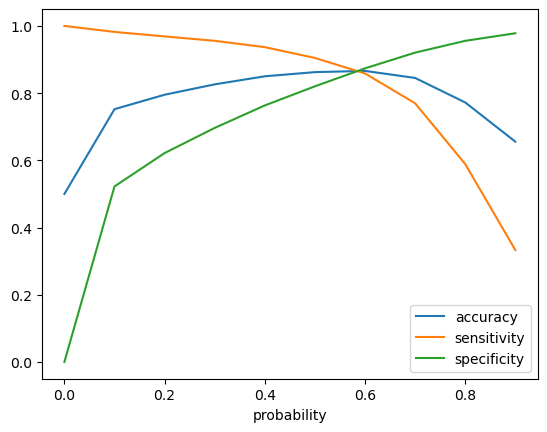

In [175]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#### Analysis of the above curve

Accuracy - Becomes stable around 0.55

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.55 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.55 as the optimum probability cutoff, we are taking 0.55 for acheiving higher sensitivity, which is our main goal.

In [176]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.464740,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.065458,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.165532,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.726868,3,1,1,1,1,1,1,1,1,0,0,1
4,0,0.000027,4,1,0,0,0,0,0,0,0,0,0,0


#### model evaluation : Metrics

In [177]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15516  2816]
 [ 2137 16195]]


In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8649083569714161
Sensitivity:- 0.883427885664412
Specificity:- 0.8463888282784202


#### ROC  curve

In [184]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    print(f"threshold: {list(thresholds)}")
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

threshold: [1.9999999615869952, 0.9999999615869953, 0.9999982441800701, 0.9999975605285112, 0.9999970957002582, 0.9999968665051759, 0.9999967477386346, 0.9999962659345178, 0.9999961803316066, 0.9999960195083443, 0.9999956861167317, 0.9999943238660132, 0.9999937909073434, 0.9999934136194674, 0.9999933303798535, 0.9999931478493066, 0.9999929079291102, 0.9999928894817385, 0.9999923391912524, 0.9999907155908301, 0.9999900709692627, 0.9999882947537588, 0.9999881079764464, 0.9999880622838556, 0.9999860588939582, 0.9999858691955303, 0.9999840716810656, 0.9999823607879352, 0.999981713333917, 0.999972722331713, 0.9999714563295484, 0.999968239740028, 0.9999666913037225, 0.9999553539898904, 0.9999545877160068, 0.9999531788005619, 0.9999428562370867, 0.9999392471826908, 0.9999369916482548, 0.9999364925110732, 0.9999339178363603, 0.9999327608460621, 0.9999313396463618, 0.9999201029964455, 0.9999184184688517, 0.9999134221302407, 0.9999101347065924, 0.9999034802892048, 0.999901968998089, 0.9999006735

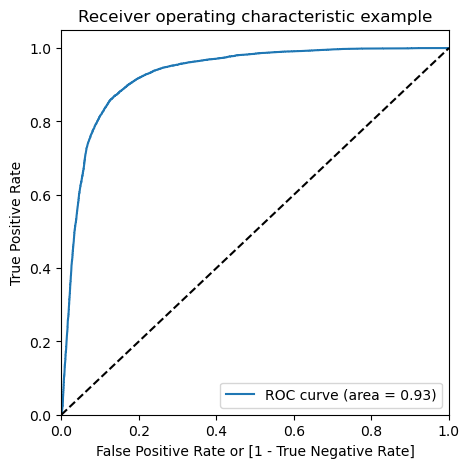

In [185]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Testing the model on the test set

In [186]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [187]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [188]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

#### Predictions on the test set with final model

In [189]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [190]:
y_test_pred.head()

37973    1.032068e-02
36755    5.762060e-01
36942    7.808282e-05
14767    9.910419e-05
13513    3.766493e-07
dtype: float64

In [191]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
37973,1.032068e-02
36755,5.762060e-01
36942,7.808282e-05
14767,9.910419e-05
13513,3.766493e-07


In [192]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
37973,0
36755,1
36942,0
14767,0
13513,0


In [193]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [194]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [196]:
y_test_pred_final.head()

,churn,CustID,0
0,0,37973,1.032068e-02
1,1,36755,5.762060e-01
2,0,36942,7.808282e-05
3,0,14767,9.910419e-05
4,0,13513,3.766493e-07


In [197]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [198]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [199]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,37973,0,1.032068e-02
1,36755,1,5.762060e-01
2,36942,0,7.808282e-05
3,14767,0,9.910419e-05
4,13513,0,3.766493e-07


In [200]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [201]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,37973,0,1.032068e-02,0
1,36755,1,5.762060e-01,1
2,36942,0,7.808282e-05,0
3,14767,0,9.910419e-05,0
4,13513,0,3.766493e-07,0


### Metrics

In [202]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6441 1422]
 [  62  218]]


In [203]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8177575832002947
Sensitivity:- 0.7785714285714286
Specificity:- 0.819152995040061


#### Model summary

    Train set
        Accuracy = 0.86
        Sensitivity = 0.88
        Specificity = 0.85
    Test set
        Accuracy = 0.82
        Sensitivity = 0.77
        Specificity = 0.82

#### Overall, the model is performing well in the test set, what it had learnt from the train set.


#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good Sensitivity, Specificity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also helps us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.


#### prectior coef
total_ic_mou_8	-2.2416<br>
ic_others_8	-1.7616<br>
std_og_mou_6	1.0115<br>
total_og_mou_8	-1.1252<br>
monthly_2g_8	-1.0882<br>
monthly_3g_8	-1.3405<br>

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the total incoming minutes of usage (total_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

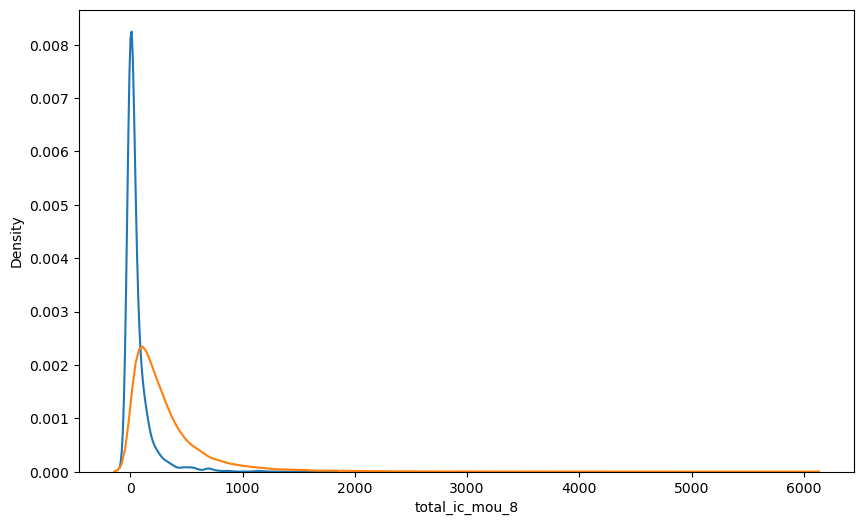

In [204]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['total_ic_mou_8'],label='not churn',hist=False)
plt.show()

#### We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

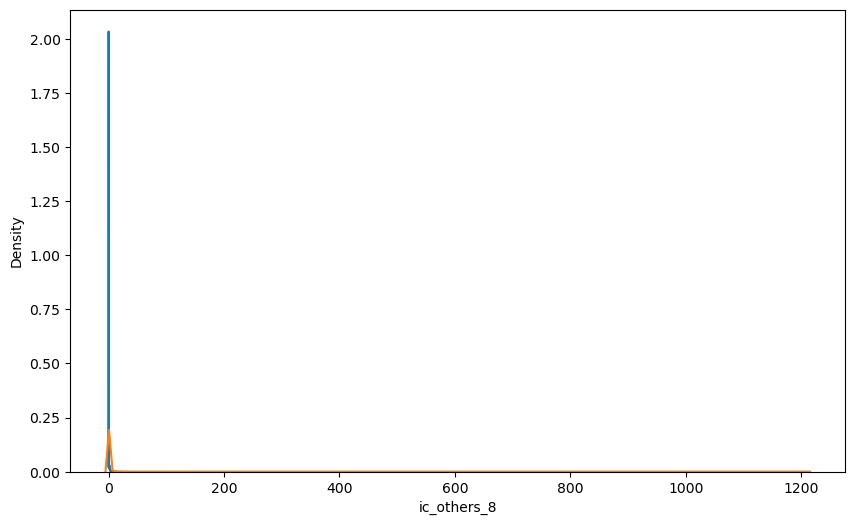

In [205]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['ic_others_8'],label='churn',hist=False)
sns.distplot(data_non_churn['ic_others_8'],label='not churn',hist=False)
plt.show()

#### We can see that the incoming others minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is more than the churn customers.

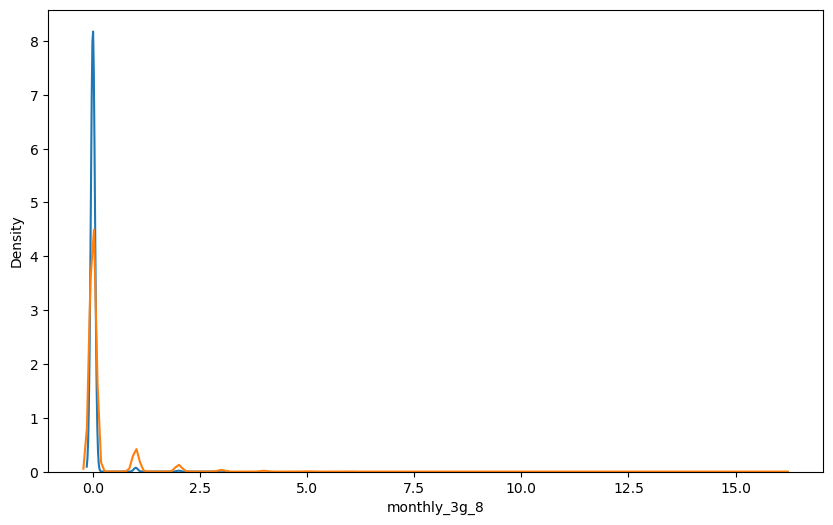

In [206]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

#### The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.

#### Recomendations

1.Target the customers, whose minutes of usage of the total incoming calls and incoming others calls are less in the action phase (mostly in the month of August).

2.The customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer. Customers, whose monthly 3G recharge in August is more, are likely to be churned.

3.Customers having decreasing STD outgoing minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.

4.Cutomers decreasing monthly 2g usage for August are most probable to churn.
